<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 6**

- Principal Component Analysis recap
- PCA in practice: coordinate systems, projections

<hr/>

# pandas

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Math

In [2]:
d = np.arange(6*6).reshape(6,6)
df = pd.DataFrame(d, columns=list("ABCDEF"), index=pd.date_range('02/17/2020', '02/22/2020'))

In [3]:
sns.load_dataset('flights')

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [4]:
df = sns.load_dataset('flights')
df[['year', 'month']]

,year,month
0,1949,January
1,1949,February
2,1949,March
3,1949,April
4,1949,May
...,...,...
139,1960,August
140,1960,September
141,1960,October
142,1960,November


<h1><font color="darkblue">Principal Component Analysis</font></h1>

<img src=files/800px-GaussianScatterPCA.png width=250 align=right>

### What Features?

- High-dimensional data
- Data transformations
- Interesting directions
- Linear combinations
- Rotated coordinate system

### Location & Dispersion

- 1-dimensional

> For example, mean and variance

- $N$-dimensional

> E.g., again mean (duh!) and covariance matrix




### Principal Components

- Eigensystem of a covariance matrix is special

> $\displaystyle  C\,\boldsymbol{e}_k = \lambda_k\,\boldsymbol{e}_k \ \ \ $ for all $k=1\dots{}N$ 
><br/><br/>
> where
><br/><br/>
> $\displaystyle \boldsymbol{e}_k^T \boldsymbol{e}_l = \delta_{kl} \ \ \ $ for all $k$ and $l$

- The 1st principal component 

> The direction of maximum variance is the eigenvector $\boldsymbol{e}_1$ 
> that belongs to the largest eigenvalue $\lambda_1$
> and $\lambda_1$ is the variance along that direction

### Linear Combination

- If $X$ is a linear combination of the eigenvectors

> $\displaystyle  X = \sum_k \boldsymbol{e}_k \beta_{k} =  E\,\boldsymbol\beta$ 
><br/><br/>
> with orthonormal $E=[\boldsymbol{e}_1, ..., \boldsymbol{e}_N]$ eigenbasis

- We get the (random variable) coefficients

> $\displaystyle  \boldsymbol{\beta} = E^T\,X$ 
><br/><br/>
> because $E^T{}E = I$

### Coordinate Transformation

- New covariance matrix is diagonal and the elements are the eigenvalues of $C$

> If $\beta=E^T X$ and again assuming $\mathbb{E}[X]=0$ then
><br/><br/>
> $\displaystyle \ \ \ \ \ \ \ \ \mathbb{E}[\beta \beta^T] = \mathbb{E}[E^T X\,X^T E] = E^T C\,E = \Lambda$
><br/><br/>
> where 
><br/><br/>
>$\displaystyle \ \ \ \ \ \ \ \ \Lambda =  \left( \begin{array}{ccc}
{\lambda_1} & 0 & \cdots & 0\\
0 & {\lambda_2} &   & \vdots\\
\vdots &  & \ddots & 0 \\
0 & \cdots & 0 & {\lambda_N} \\
\end{array} \right)$

<!-- -->

> Recall $C\,\boldsymbol{e}_l = \lambda_l\,\boldsymbol{e}_l$ for all $l$, so the $(k,l)$ element of the new covariance matrix 
><br/><br/>
>$\displaystyle \ \ \ \ \ \ \ \ \boldsymbol{e}_k^T C\,\boldsymbol{e}_l = \lambda_l\,\boldsymbol{e}_k^T  \boldsymbol{e}_l  = \lambda_l\delta_{kl} = \Lambda_{kl}$

### Eigendecomposition 

- If we multiply with $E$ and $E^T$ from left and right 

> $ C = E\,\Lambda\,E^T$
><br/><br/>
> or
><br/><br/>
>$\displaystyle C = \sum_{k=1}^N\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) $

### Largest Eigenvalues

- The eigenvectors of largest eigenvalues capture the most variance

> If keeping only $K<N$ eigenvectors, the best is to take the ones belonging to the $K$ largest eigenvalues PCs
><br/><br/>
> $\displaystyle  C \approx \sum_{k=1}^K\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) =  E_K\Lambda_KE_K^T$



### Dimensionality Reduction


- A truncated set of eigenvectors $E_K$ defines a transformation that reduces the dimensionality from $N$ to $K$ while preserving the most variance possible

> $\displaystyle  \beta_K = E_K^T\, X $
><br/><br/>
> and
><br/><br/>
> $\displaystyle  X_K = E_K \beta_K = E_K E_K^T\, X = P_K\,X $




### Random Sample from Bivariate Normal 

- See previous lecture

In [5]:
%pylab inline
from scipy.stats import norm as gaussian

Populating the interactive namespace from numpy and matplotlib


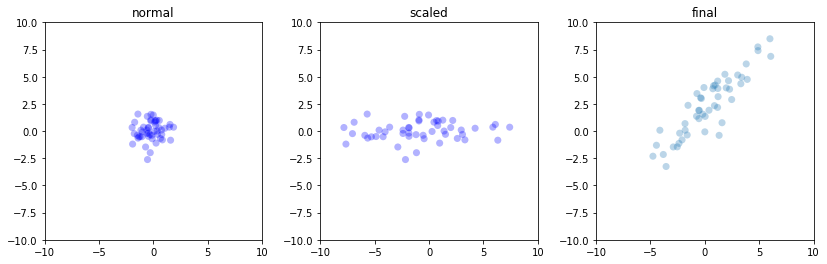

In [6]:
# generate many 2D (column) vectors 
np.random.seed(42)
N = gaussian.rvs(0,1,(2,50))
# copy and scale it
S = np.copy(N)
S[0,:] *= 4  # scale axis 0
# rotate it
f = +pi/4    # rotate by 45 degrees
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(S)
# shift it
X += np.array([[1],[3]])

figure(figsize=(14,4)); #xlim(-10,10); ylim(-10,10);
subplot(1,3,1).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('normal')
scatter(N[0,:],N[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,3,2).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('scaled')
scatter(S[0,:],S[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,3,3).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('final')
scatter(X[0,:],X[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

In [7]:
# subtract sample mean
avg = mean(X, axis=1).reshape(X[:,1].size,1)
X -= avg
# sample covariance matrix
C = X.dot(X.T) / (X[0,:].size-1) 
print ("Average\n", avg)
print ("Covariance\n", C)

Average
 [[0.34969052]
 [2.37483646]]
Covariance
 [[6.99670167 6.59167706]
 [6.59167706 7.71554082]]


In [8]:
# eigen decomposition of sample covariance matrix
L, E = np.linalg.eig(C)
E, L

(array([[-0.72610102, -0.68758803],
        [ 0.68758803, -0.72610102]]),
 array([ 0.75465255, 13.95758994]))

In [9]:
# singular value decomposition of covariance yields the same
E, L, E_same = np.linalg.svd(C)
E, L

(array([[-0.68758803, -0.72610102],
        [-0.72610102,  0.68758803]]),
 array([13.95758994,  0.75465255]))

In [10]:
# it's a rotation!
E.dot(E.T)

array([[1.0000000e+00, 2.7209678e-17],
       [2.7209678e-17, 1.0000000e+00]])

In [11]:
# also 
np.allclose( E.T, np.linalg.inv(E) )

True

In [12]:
# singular value decomposition of data matrix yields also the same
U, W, V = np.linalg.svd(X)
U, W**2 / (X[0,:].size-1)

(array([[-0.68758803, -0.72610102],
        [-0.72610102,  0.68758803]]),
 array([13.95758994,  0.75465255]))

In [13]:
# check out the properties of U and V
[ np.allclose( U.T.dot(U), np.eye(U[:,0].size) ), 
  np.allclose( V.T.dot(V), np.eye(V[:,0].size) )  ]

[True, True]

In [14]:
# principle components from sklearn
from sklearn import decomposition

In [15]:
# object-oriented interface
pca = decomposition.PCA(n_components=X[:,0].size)
# sklearn uses a different convention
pca.fit(X.T) # note the transpose
# pca.transform(X.T)
print (pca.components_.T, pca.explained_variance_)

[[ 0.68758803  0.72610102]
 [ 0.72610102 -0.68758803]] [13.95758994  0.75465255]


In [16]:
# no more bug in the sklearn code - yeay! 
print (E, L)

[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]] [13.95758994  0.75465255]


In [17]:
# use to yield results without bessel correction
print (U, W**2 / X[0,:].size)

[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]] [13.67843814  0.7395595 ]


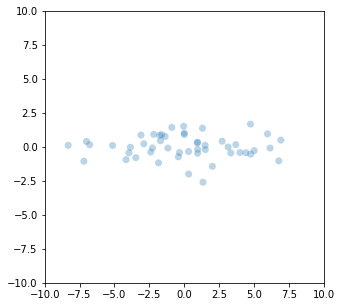

In [18]:
# rotation
A = E.T.dot(X);
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(A[0,:],A[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

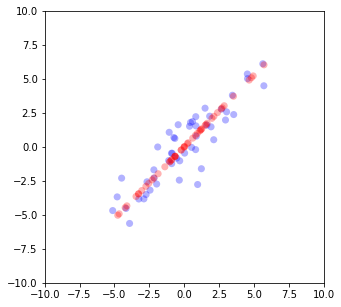

In [19]:
# projected points
P = E[:,:1].dot(E[:,:1].T).dot(X)

figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(X[0,:],X[1,:],marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
scatter(P[0,:],P[1,:],marker='o',color='r', s=50, alpha=0.3, edgecolor='none');

### Whitening
- Frequently used to preprocess data, e.g., in signal processing

>$ \displaystyle Z = \Lambda^{-1/2}\ E^T\ X$

- **Unhomework:** Verify that its covariance matrix is identity

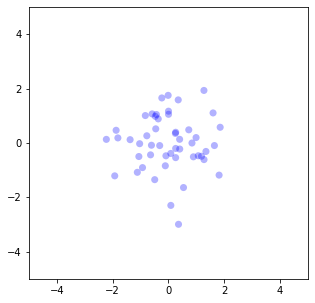

In [20]:
# calc and plot whitened coordinates
B = diag(1/sqrt(L)).dot(A)
figure(figsize=(5,5)); xlim(-5,5); ylim(-5,5);
scatter(B[0,:],B[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');

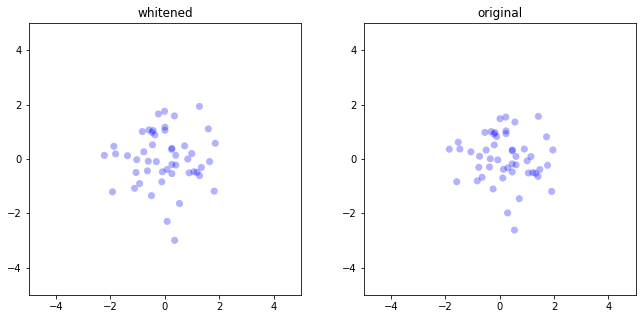

In [21]:
# cf. original normal randoms in cell [2]
figure(figsize=(11,5)); 
subplot(1,2,1).set_aspect('equal'); xlim(-5,5); ylim(-5,5); title('whitened')
scatter(B[0,:],B[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,2,2).set_aspect('equal'); xlim(-5,5); ylim(-5,5); title('original')
scatter(-N[0,:],N[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');